<h1>Import Packages<h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 

from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Activation
from keras.optimizers import RMSprop   
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau
import cv2
import glob as gb

%matplotlib inline

In [2]:
path="C:/Multi Faceted Skin Disorder Classification/train"

In [3]:

code={'Acne and Rosacea Photos':0,'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions':1,'Atopic Dermatitis Photos':2, 'Eczema Photos':3, 'Nail Fungus and other Nail Disease':4, 'Psoriasis pictures Lichen Planus and related diseases':5,'Monkeypox':6}
def getcode(n):
    for x,y in code.items():
        if n==y:
            return x

<h1>Read and Preparing Data</h1>

In [4]:
for folder in os.listdir(path):   
    files=gb.glob(str(path+'/'+folder+'/*.jpg'))
    print(f"for traning data found,{len(files)} in folder {folder}")

for traning data found,312 in folder Acne and Rosacea Photos
for traning data found,288 in folder Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
for traning data found,123 in folder Atopic Dermatitis Photos
for traning data found,309 in folder Eczema Photos
for traning data found,968 in folder Monkeypox
for traning data found,261 in folder Nail Fungus and other Nail Disease
for traning data found,352 in folder Psoriasis pictures Lichen Planus and related diseases


In [5]:
#
x_train=[]
y_train=[]
for folder in os.listdir(path):# path  
    files=gb.glob(str(path+'/'+folder+'/*.jpg'))#
    for file in files:#ر 
        image=cv2.imread(file)# 
        image_array=cv2.resize(image,(224,224))#
        x_train.append(image_array)# 
        y_train.append(code[folder])#  

In [6]:
print(len(x_train),len(y_train))#

2613 2613


<h1>Image Preprocessing</h1>

0

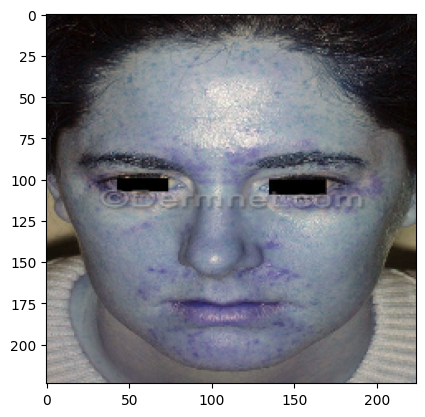

In [7]:
plt.imshow(x_train[200])#
y_train[200]#

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=44, shuffle=True)#

In [9]:
X_train=np.array(x_train)
Y_train=np.array(y_train)
X_test=np.array(x_test)
Y_test=np.array(y_test)

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0

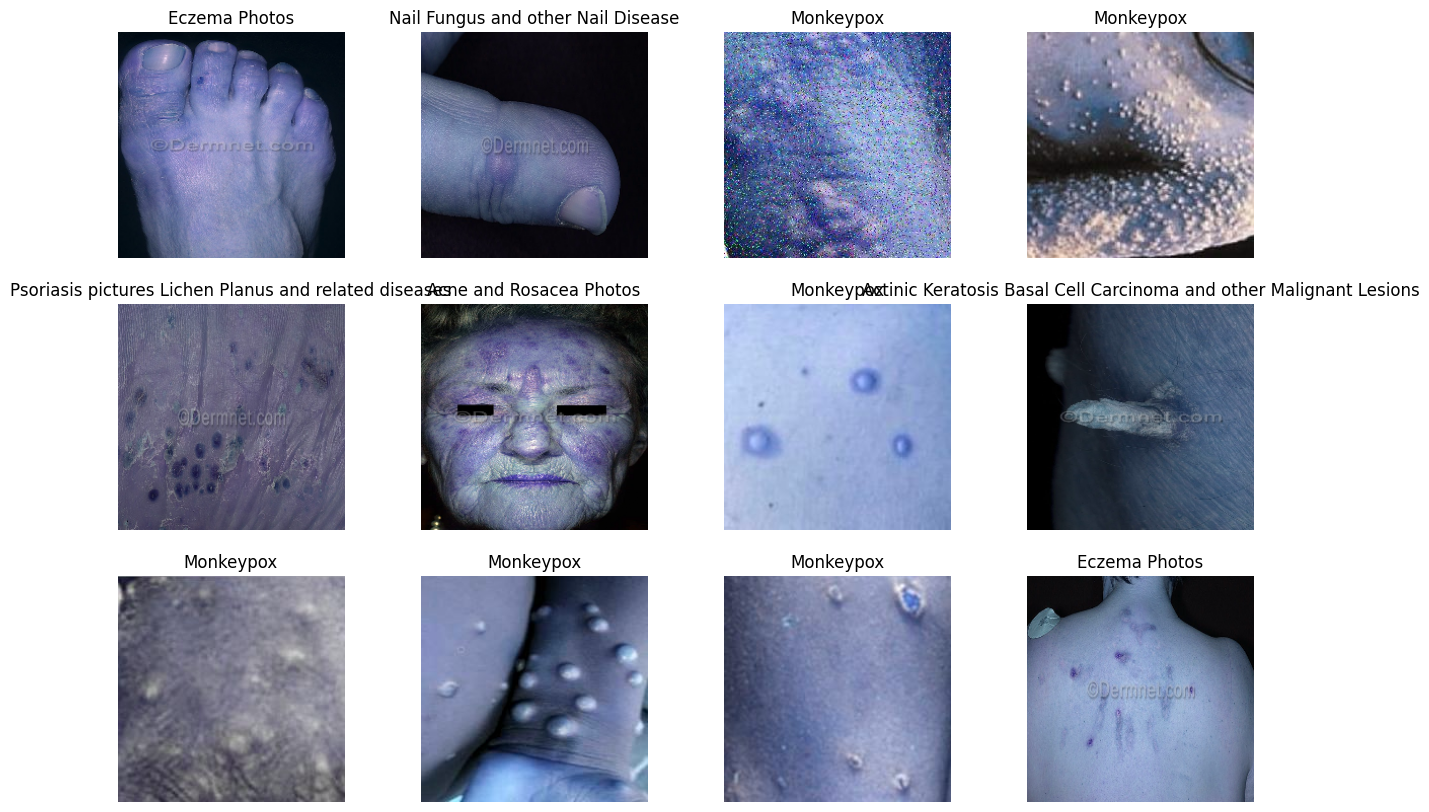

In [11]:
plt.figure(figsize=(15,10))
for n,i in enumerate(list(np.random.randint(0,len(X_train),12))):
    plt.subplot(3,4,n+1)
    plt.imshow(X_train[i])
    plt.axis("off")
    plt.title(getcode(Y_train[i]))

In [12]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
learning_rate_reduction=ReduceLROnPlateau(monitor="val_loss",patience=2
                                          ,verbose=1,factor=0.2
                                          ,min_lr=0.00001)

<h1>Building Model</h1>

In [13]:
input_shape = (224,224, 3)
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), input_shape=input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16))
model1.add(Dense(7, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 activation (Activation)     (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [14]:
hist=model1.fit(X_train, Y_train, epochs = 10,validation_data=(X_test, Y_test),callbacks=[learning_rate_reduction])

Epoch 1/10
55/55 [==============================] - 141s 3s/step - loss: 2.3664 - accuracy: 0.3354 - val_loss: 1.5302 - val_accuracy: 0.4287 - lr: 0.0010
Epoch 2/10
55/55 [==============================] - 140s 3s/step - loss: 1.4068 - accuracy: 0.5040 - val_loss: 1.4572 - val_accuracy: 0.4681 - lr: 0.0010
Epoch 3/10
55/55 [==============================] - 141s 3s/step - loss: 1.0175 - accuracy: 0.6589 - val_loss: 1.4466 - val_accuracy: 0.5133 - lr: 0.0010
Epoch 4/10
55/55 [==============================] - 138s 3s/step - loss: 0.7558 - accuracy: 0.7611 - val_loss: 1.6468 - val_accuracy: 0.5307 - lr: 0.0010
Epoch 5/10
55/55 [==============================] - ETA: 0s - loss: 0.5363 - accuracy: 0.8360
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
55/55 [==============================] - 151s 3s/step - loss: 0.5363 - accuracy: 0.8360 - val_loss: 1.8094 - val_accuracy: 0.5353 - lr: 0.0010
Epoch 6/10
55/55 [==============================] - 147s 3s/step - los

In [15]:
model1.save('skin_model2.h5')
print('Model Saved!')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved!


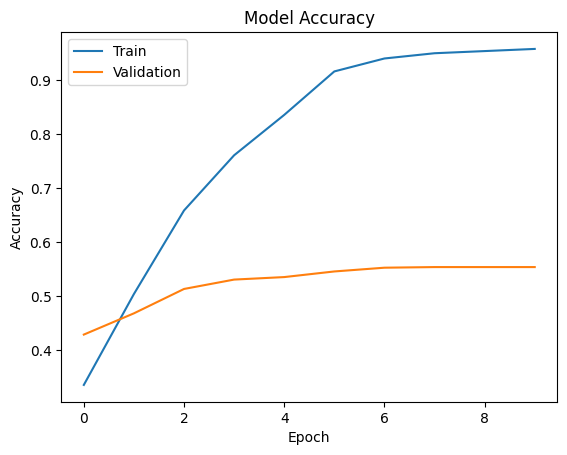

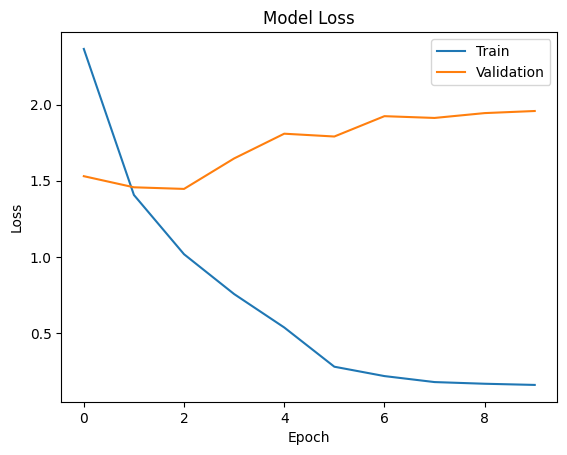

In [16]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Model Evaluation

In [17]:
import numpy as np
from keras.preprocessing import image
image_pred=image.load_img("C:/Multi Faceted Skin Disorder Classification/test/Monkeypox/M48_01_04.jpg",target_size=(224,224))# Add ur test image path
image_pred=image.img_to_array(image_pred)
image_pred=np.expand_dims(image_pred,axis=0)
rslt=model1.predict(image_pred)
if rslt[0][0]==1.0:
  print("Acne and Rosacea Photos")
if rslt[0][1]==1.0:
  print("Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions")
if rslt[0][2]==1.0:
  print("Atopic Dermatitis")
if rslt[0][3]==1.0:
  print("Eczema")
if rslt[0][4]==1.0:
  print("Nail Fungus and other Nail Disease")
if rslt[0][5]==1.0:
  print("Psoriasis pictures Lichen Planus and related diseases")
if rslt[0][6]==1.0:
  print("Monkeypox")

1/1 [==============================] - 1s 545ms/step
Monkeypox
